<h3><b>Data Loading and Preprocessing</b></h3>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv("data/hotel_bookings.csv")

In [53]:
print("Shape of Dataset:",df.shape)
df.head()

Shape of Dataset: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [54]:
df.isna().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [56]:
df.duplicated().sum() # checking duplicatess

31994

In [57]:
df.drop_duplicates(inplace=True) # removing duplicates

In [58]:
df.duplicated().sum()

0

<h4><b>Handling Missing Values</b></h4>

<b>Removing NULL Values</b>

In [59]:
df_cleaned = df.dropna()

In [60]:
df_cleaned.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [61]:
df_cleaned.duplicated().sum()

0

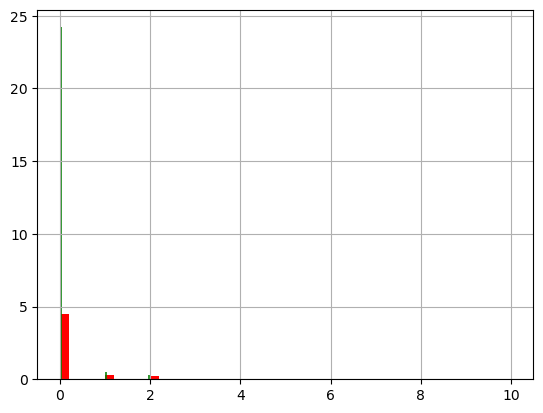

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['children'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_cleaned['children'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

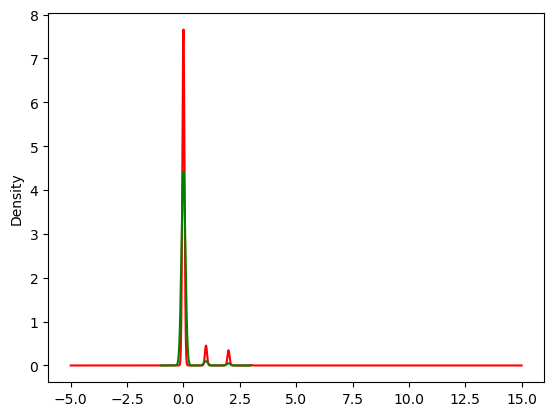

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['children'].plot.density(color='red')

# data after cca
df_cleaned['children'].plot.density(color='green')
plt.show()

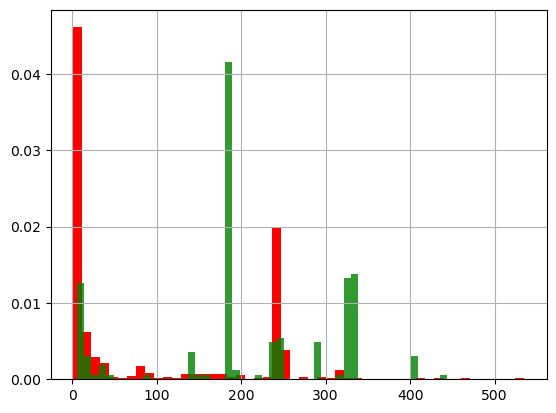

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['agent'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_cleaned['agent'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

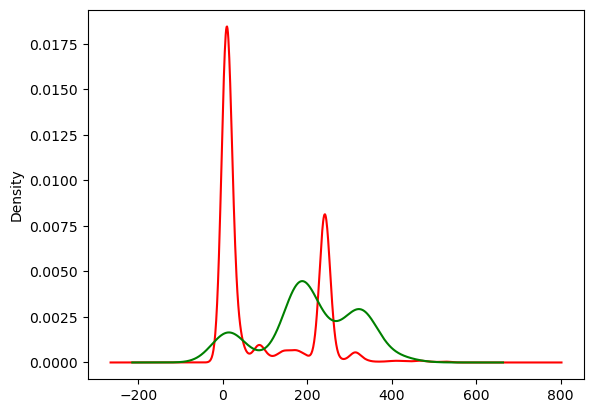

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['agent'].plot.density(color='red')

# data after cca
df_cleaned['agent'].plot.density(color='green')
plt.show()

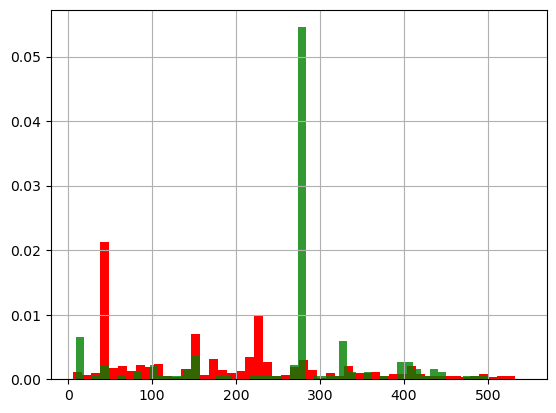

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['company'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_cleaned['company'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

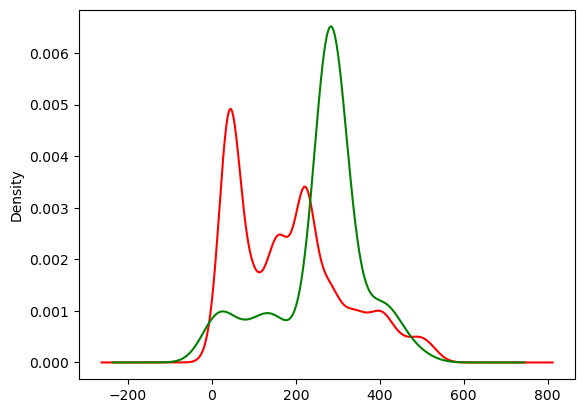

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['company'].plot.density(color='red')

# data after cca
df_cleaned['company'].plot.density(color='green')
plt.show()

In [68]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['country'].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cleaned['country'].value_counts() / len(df_cleaned)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
country,,
PRT,0.314122,0.407407
GBR,0.119376,0.100529
FRA,0.101114,0.105820
ESP,0.082979,0.042328
DEU,0.061639,0.037037
...,...,...
MMR,0.000011,NaN
BFA,0.000011,NaN
CYM,0.000011,NaN


Removing NULL values causes significant changes in the distribution. Hence, we will impute the NULL values

<b>Imputing NULL Values<b>

In [69]:
df2 = df.copy()

In [70]:
df2.duplicated().sum()

0

In [71]:
# Fill missing values in 'agent' with the most frequent agent ID
df2['agent'].fillna(df2['agent'].mode()[0], inplace=True)

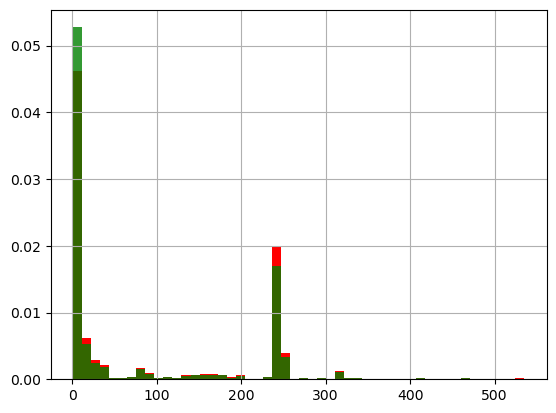

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['agent'].hist(bins=50, ax=ax, density=True, color='red')

# see the overlay of the 2 distributions
df2['agent'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

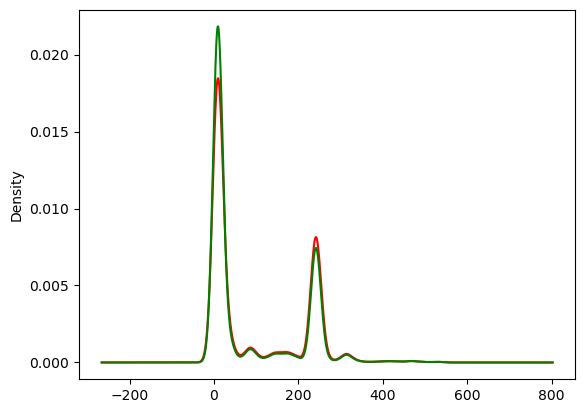

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['agent'].plot.density(color='red')

# data after cca
df2['agent'].plot.density(color='green')
plt.show()

In [74]:
df.groupby(df['company'].isnull()).agg({'adr': 'mean', 'is_canceled': 'mean'})

,adr,is_canceled
company,,
False,66.030046,0.109146
True,108.918003,0.285511


Company vs. Individual bookings significantly impact revenue & cancellations

In [75]:
df3 = df.copy()

In [76]:
df3['is_corporate'] = df3['company'].notnull().astype(int)
df3.drop(columns=['company'], inplace=True)  # Drop original column

In [77]:
df3.duplicated().sum()

4

In [78]:
# Replace null values in 'children' with 0
df3['children'].fillna(0, inplace=True)

# Replace null values in 'agent' with the most frequent agent ID (mode)
df3['agent'].fillna(df3['agent'].mode()[0], inplace=True)
df3['agent'] = df3['agent'].astype(int)  # Convert to integer

# Replace null values in 'country' with the most common country (mode)
df3['country'].fillna(df3['country'].mode()[0], inplace=True)

In [79]:
df3.isnull().mean()*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [80]:
df3.duplicated().sum()

24

When we drop duplicates first, we are removing rows that were exactly identical at that time. However, when we fill missing values, previously unique-looking rows might become identical, leading to a new set of duplicates.

Correct Order of Operations
- 1️⃣ Handle missing values properly
- 2️⃣ Convert data types cautiously
- 3️⃣ Drop duplicates only at the end

In [81]:
# 1️⃣ Handle missing values
df['children'].fillna(0, inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['agent'] = df['agent'].astype(int)

# 2️⃣ Fill missing values in 'country' using weighted random choice
most_common_countries = df['country'].dropna().value_counts(normalize=True)
df.loc[df['country'].isna(), 'country'] = np.random.choice(
    most_common_countries.index,
    size=df['country'].isna().sum(),
    p=most_common_countries.values
)

# 3️⃣ Create 'is_corporate' column & drop 'company'
df['is_corporate'] = df['company'].notnull().astype(int)
df.drop(columns=['company'], inplace=True)  # Drop original column

# 4️⃣ Remove duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)


In [82]:
df.duplicated().sum()

0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87385 entries, 0 to 87384
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87385 non-null  object 
 1   is_canceled                     87385 non-null  int64  
 2   lead_time                       87385 non-null  int64  
 3   arrival_date_year               87385 non-null  int64  
 4   arrival_date_month              87385 non-null  object 
 5   arrival_date_week_number        87385 non-null  int64  
 6   arrival_date_day_of_month       87385 non-null  int64  
 7   stays_in_weekend_nights         87385 non-null  int64  
 8   stays_in_week_nights            87385 non-null  int64  
 9   adults                          87385 non-null  int64  
 10  children                        87385 non-null  float64
 11  babies                          87385 non-null  int64  
 12  meal                            

<h3><b>Data Analytics</b></h3>

In [84]:
# Convert date column
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format="%d-%m-%Y")

#### ADR (Average Daily Rate) is a key hotel metric that represents the average revenue per occupied room per night.

### ADR = Total Room Revenue/Total Rooms Sold

#### ADR does not consider empty rooms; it only accounts for revenue from occupied rooms.


In [85]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

In [86]:
# Aggregate revenue by month
df_monthly = df.groupby(pd.Grouper(key='reservation_status_date', freq='M'))['revenue'].sum()

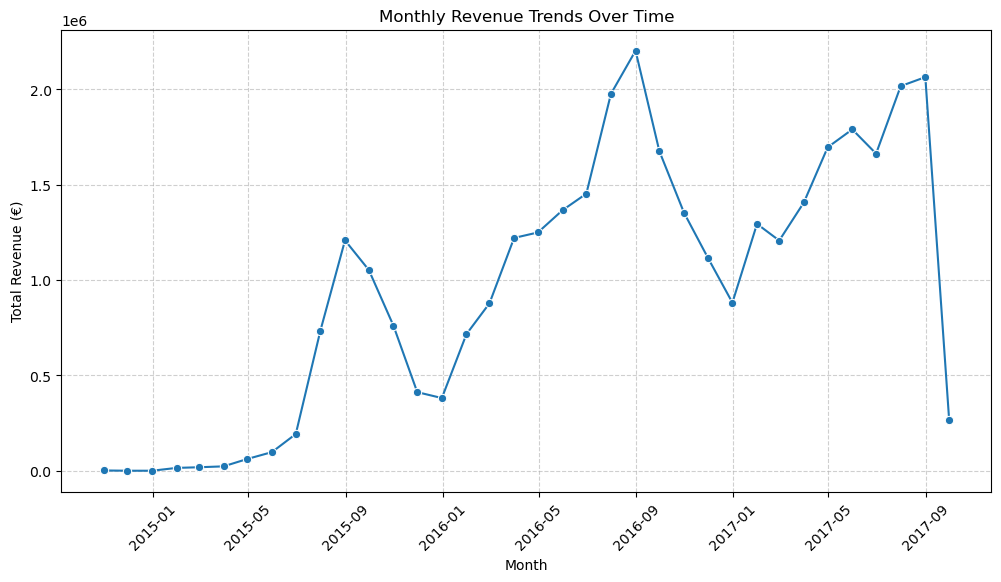

In [87]:
# Plot revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(df_monthly, marker='o', linestyle='-')

plt.xlabel("Month")
plt.ylabel("Total Revenue (€)")
plt.title("Monthly Revenue Trends Over Time")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


📊 Cancellation Rate: 27.49%


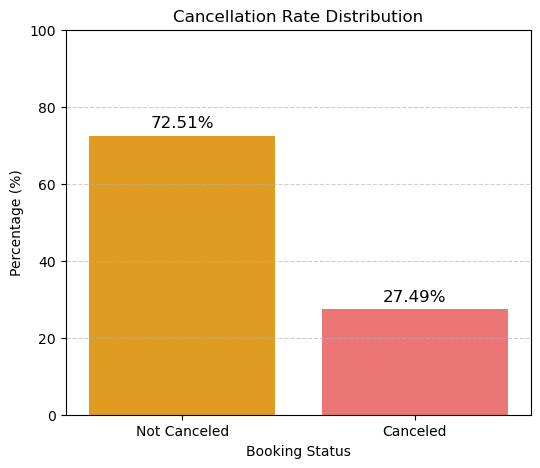

In [88]:
# Calculate cancellation rate
cancellation_rate = df['is_canceled'].mean() * 100
print(f"📊 Cancellation Rate: {cancellation_rate:.2f}%")

# Plot cancellation rate
plt.figure(figsize=(6, 5))
sns.barplot(
    x=['Not Canceled', 'Canceled'], 
    y=df['is_canceled'].value_counts(normalize=True) * 100, 
    palette=['#ffa600', '#ff6361']
)

# Improve the plot aesthetics
plt.ylabel("Percentage (%)")
plt.xlabel("Booking Status")
plt.title("Cancellation Rate Distribution")
plt.ylim(0, 100)  # Ensure percentage scale
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the percentage values on the bars
for index, value in enumerate(df['is_canceled'].value_counts(normalize=True) * 100):
    plt.text(index, value + 2, f"{value:.2f}%", ha='center', fontsize=12)

plt.show()

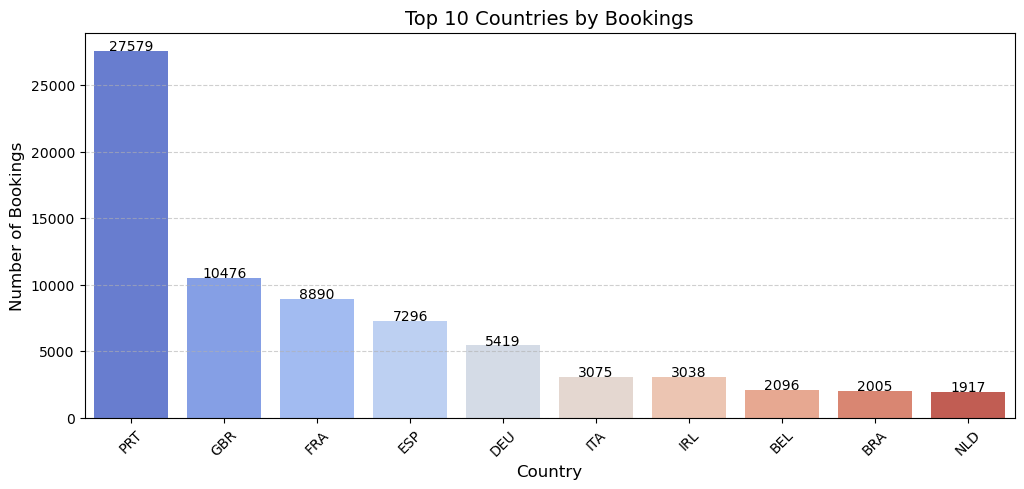

In [89]:
# Count bookings by country (Top 10 countries)
country_counts = df['country'].value_counts().head(10)

# Plot geographical distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")

# Improve aesthetics
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.title("Top 10 Countries by Bookings", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show values on bars
for index, value in enumerate(country_counts.values):
    plt.text(index, value + 50, str(value), ha='center', fontsize=10)

plt.show()

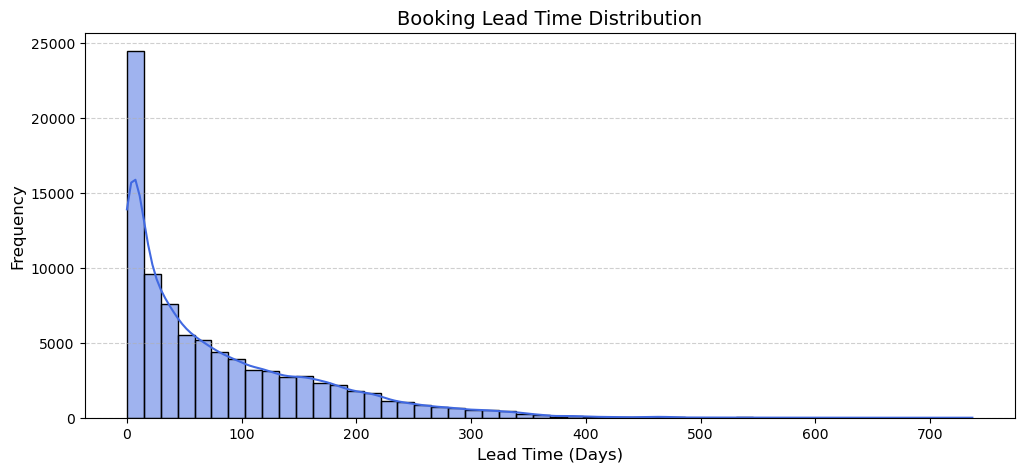

In [90]:
# Plot lead time distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color="royalblue", edgecolor="black")

# Improve aesthetics
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Booking Lead Time Distribution", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()

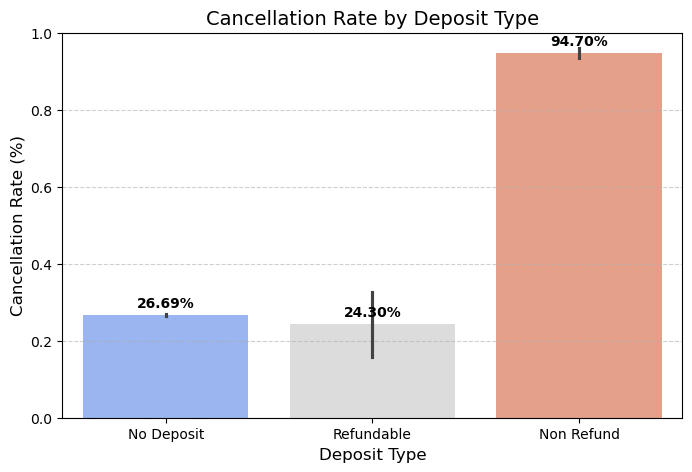

In [91]:
# Plot: Cancellation Rate by Deposit Type
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='deposit_type', y='is_canceled', data=df, estimator=np.mean, palette="coolwarm")

# Improve aesthetics
plt.xlabel("Deposit Type", fontsize=12)
plt.ylabel("Cancellation Rate (%)", fontsize=12)
plt.title("Cancellation Rate by Deposit Type", fontsize=14)
plt.ylim(0, 1)  # Since it's a proportion (0 to 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Correct annotation positioning
deposit_types = [t.get_text() for t in ax.get_xticklabels()]  # Get sorted deposit types
deposit_means = df.groupby("deposit_type")["is_canceled"].mean().reindex(deposit_types)

for index, (deposit, value) in enumerate(deposit_means.items()):
    plt.text(index, value + 0.02, f"{value:.2%}", ha='center', fontsize=10, fontweight='bold')

plt.show()

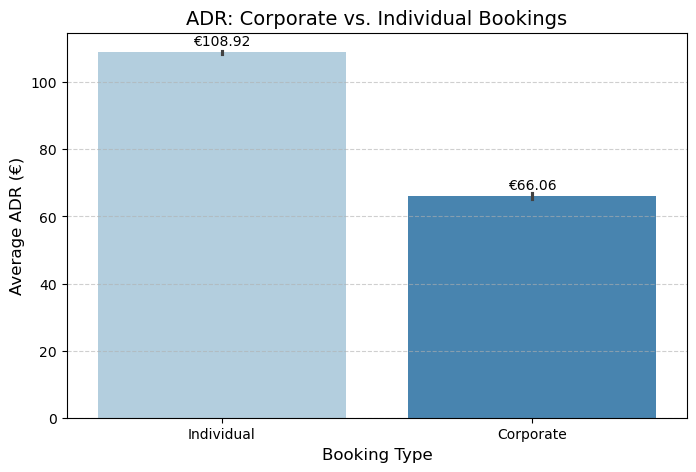

In [92]:
# Plot: ADR for Corporate vs. Individual Bookings
plt.figure(figsize=(8, 5))
sns.barplot(x='is_corporate', y='adr', data=df, estimator=np.mean, palette="Blues")

# Improve aesthetics
plt.xticks([0, 1], ['Individual', 'Corporate'])
plt.xlabel("Booking Type", fontsize=12)
plt.ylabel("Average ADR (€)", fontsize=12)
plt.title("ADR: Corporate vs. Individual Bookings", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show ADR values on bars
for index, value in enumerate(df.groupby("is_corporate")["adr"].mean()):
    plt.text(index, value + 2, f"€{value:.2f}", ha='center', fontsize=10)

plt.show()

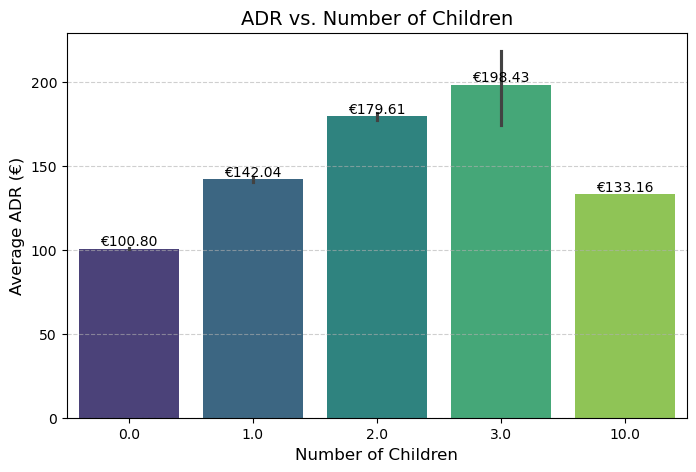

In [93]:
plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='adr', data=df, estimator=np.mean, palette="viridis")

plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Average ADR (€)", fontsize=12)
plt.title("ADR vs. Number of Children", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show ADR values on bars
for index, value in enumerate(df.groupby("children")["adr"].mean()):
    plt.text(index, value + 2, f"€{value:.2f}", ha='center', fontsize=10)

plt.show()

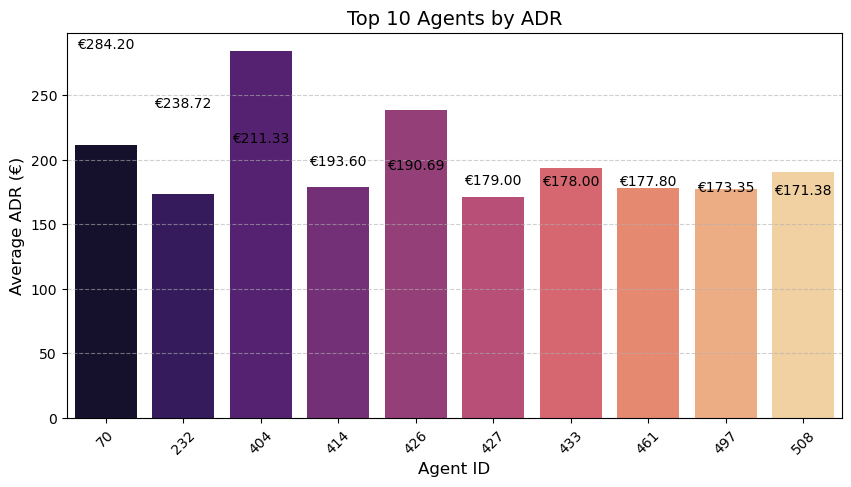

In [94]:
# Top 10 Agents by Revenue
top_agents = df.groupby("agent")["adr"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_agents.index, y=top_agents.values, palette="magma")

plt.xlabel("Agent ID", fontsize=12)
plt.ylabel("Average ADR (€)", fontsize=12)
plt.title("Top 10 Agents by ADR", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show ADR values on bars
for index, value in enumerate(top_agents.values):
    plt.text(index, value + 2, f"€{value:.2f}", ha='center', fontsize=10)

plt.show()

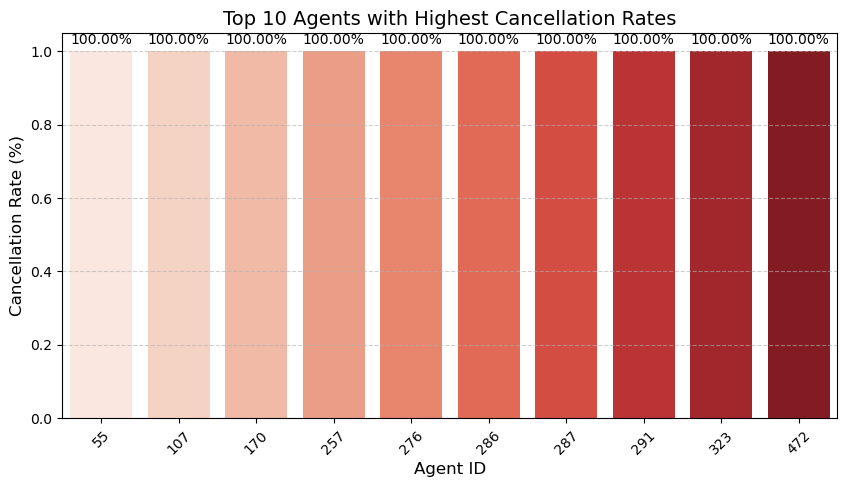

In [95]:
# Top 10 Agents with Highest Cancellation Rates
top_cancel_agents = df.groupby("agent")["is_canceled"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cancel_agents.index, y=top_cancel_agents.values, palette="Reds")

plt.xlabel("Agent ID", fontsize=12)
plt.ylabel("Cancellation Rate (%)", fontsize=12)
plt.title("Top 10 Agents with Highest Cancellation Rates", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show percentage values on bars
for index, value in enumerate(top_cancel_agents.values):
    plt.text(index, value + 0.02, f"{value:.2%}", ha='center', fontsize=10)

plt.show()

In [96]:
df.to_csv("data/hotel_bookings_cleaned.csv", index=False)

In [97]:
df=pd.read_csv("data/hotel_bookings_cleaned.csv")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87385 entries, 0 to 87384
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87385 non-null  object 
 1   is_canceled                     87385 non-null  int64  
 2   lead_time                       87385 non-null  int64  
 3   arrival_date_year               87385 non-null  int64  
 4   arrival_date_month              87385 non-null  object 
 5   arrival_date_week_number        87385 non-null  int64  
 6   arrival_date_day_of_month       87385 non-null  int64  
 7   stays_in_weekend_nights         87385 non-null  int64  
 8   stays_in_week_nights            87385 non-null  int64  
 9   adults                          87385 non-null  int64  
 10  children                        87385 non-null  float64
 11  babies                          87385 non-null  int64  
 12  meal                            